In [1]:
import GERDA_light as gl 
import matplotlib.pyplot as plt
import numpy as np
import logging as log
import matplotlib.pyplot as plt
import logging as log
logger = log.getLogger()
logger.setLevel(log.DEBUG)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


The probability for an infection event during $\Delta T$
$$P^I_{i,j,\Delta T} = \sum^{T_2}_{l=T_1}k_I \cdot p_{i,j,l}\prod^{l-1}_{m=0}\left(1-k_I \cdot p_{i,j,m}\right)$$

$$P^I_{i,j,\Delta T} = \sum^{\Delta T}_{l=1}{k_I}^{l+1} \cdot p_{i,j,l}\prod^{l-1}_{m=0}\left(\frac{1}{k_I} -p_{i,j,m}\right)$$


In [2]:
## contact probabilities
p = np.array([0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.0,0,0])#,0.0,0.0,0.0,0.5,0.5,0.1,1,1,1,0.0,0.1,0.1,0.1,0,0,0.1,0.5,0,0.5,0.5])
## conditional infection probability
k_I = 0.3
### probabability for an infection in time span T = {t: t>Tmin,t<T_max} - (T_min,T_max)
T_min,T_max = 0,2
T = np.arange(T_min,T_max)

In [3]:
P_I = 0 
for l,t in enumerate(T):
    cp =  1-k_I*p[0:l]## counter probability
    log.debug(f'cp: {cp}')
    P_I += k_I**(t+1)*p[t]*cp.prod()
P_I    

DEBUG:root:cp: []
DEBUG:root:cp: [0.97]


0.03873

$$P^I_{i,j,\Delta T} = p^I_{i,j,1}(1-p^I_{i,j,0}) + p^I_{i,j,2} (1-p^I_{i,j,1})(1-p^I_{i,j,0})+ p^I_{i,j,3} (1-p^I_{i,j,2})(1-p^I_{i,j,1})(1-p^I_{i,j,0}) \quad + \quad ...\\
p^I_{i,j,t} =  k_I \cdot p^C_{i,j,t}
$$

$$P^I_{i,j,\Delta T} = 1 - \prod_{t=1}^T(1-p^I_{i,j,t})$$

##### Test wether both are equivalent 

N = 4

In [4]:
p_s = np.array([0.1,0.9,0.9,0.1])
P_I = p_s[0]*k_I+ p_s[1]*k_I*(1-p_s[0]*k_I)+p_s[2]*k_I*(1-p_s[1]*k_I)*(1-p_s[0]*k_I)+p_s[3]*k_I*(1-p_s[2]*k_I)*(1-p_s[1]*k_I)*(1-p_s[0]*k_I)
log.debug(f'P^I test for n=4 :{P_I}')

P_I = 1-(1-p_s[3]*k_I)*(1-p_s[2]*k_I)*(1-p_s[1]*k_I)*(1-p_s[0]*k_I)
log.debug(f'P^I using the counter prob. test for n=4 :{P_I}')

DEBUG:root:P^I test for n=4 :0.49859439000000005
DEBUG:root:P^I using the counter prob. test for n=4 :0.49859439000000005


N=31

In [5]:
p_b = np.array([0.1,0.9,0.9,0.1,0.1,0.1,0.1,0.1,0.0,0,0,0.0,0.0,0.0,0.5,0.5,0.1,1,1,1,0.0,0.1,0.1,0.1,0,0,0.1,0.5,0,0.5,0.5])
P_I = 1-(1-k_I*p_b).prod()
log.debug(f'P^I using the counter prob. test for n=4 :{P_I}')

P_1=0
for l,p1 in enumerate(p):
    if l>-1:
        P_1+=p1*k_I * (1-k_I*p_b[:l]).prod() ### array[min:max] max not inluded
    else:
        P_1+=p1*k_I
    #log.debug(f'cp: {P1} , l:{l}')    

log.debug(f'P^I test for n=4 :{P_I}')

DEBUG:root:P^I using the counter prob. test for n=4 :0.9419872376031504
DEBUG:root:P^I test for n=4 :0.9419872376031504


What is error using only the linear and the quadratic terms as approximation

$$
\begin{align}
	P^I_{\Delta T} &\approx p_I \underbrace{\sum_{t=T_1}^{T_2}p_t}_{\mathbb{P}_1} - p_I^2\underbrace{\sum_{t=T_1}^{T_2}p_t\sum_{k=0}^{t-1}p_k}_{\mathbb{P}_2}\\
	&\approx p_I \cdot \mathbb{P}_1 - p_I^2 \cdot \mathbb{P}_2
\end{align}
$$

In [6]:
P2 = 0
p0 = np.array([0] + list(p))
for l,pt in enumerate(p):
    P2 += pt*p0[:l].sum()
P1 = p.sum()

log.info(f'k_I*P_1: {k_I*P1}')
log.info(f'k_I**2*P2: {k_I**2*P2}')
log.info(f'k_I*P1-(k_I**2)*P2: {k_I*P1-(k_I**2)*P2}')
log.info(f'1-(1-k_I*p_b).prod(): {1-(1-k_I*p).prod()}')


INFO:root:k_I*P_1: 0.27
INFO:root:k_I**2*P2: 0.0234
INFO:root:k_I*P1-(k_I**2)*P2: 0.2466
INFO:root:1-(1-k_I*p_b).prod(): 0.240496125905738


Collecting additional the terms of  order n=3 provides the following approximation:




$$
\begin{align}
	P^I_{\Delta T} &\approx p_I \underbrace{\sum_{t=T_1}^{T_2}p_t}_{\mathbb{P}_1} - p_I^2\underbrace{\sum_{t=T_1}^{T_2}p_t\sum_{k=0}^{t-1}p_k}_{\mathbb{P}_2}  + p_I^3 \underbrace{\sum^{T=2}_{t=2} p_t \sum^{t-1}_{k=1} p_k \sum^{k-1}_{l=0} p_l}_{\mathbb{P}_3}\\
	&\approx p_I \cdot \mathbb{P}_1 - p_I^2 \cdot \mathbb{P}_2+ p_I^3 \cdot \mathbb{P}_3
\end{align}
$$

In [79]:
def get_P1(p:list)-> float:
    return sum(p)


def get_P2(p:list)-> float: 
    ## assumed that p is arranged from early to later time points
    P2 = 0.0
    for l,pt in enumerate(p):
        P2 += pt * sum(p[:l]) ## numpy?
        #log.debug((P2,pt,l,p[:l]))
    return P2


def get_P3(p:list)-> float: 
    ## assumed that p is arranged from early to later time points
    P2 = 0.0
    for l,pt in enumerate(p):
        P2 += pt * sum(p[:l]) ## numpy?
        #log.debug((P2,pt,l,p[:l]))
    return P2


def get_P3(p):
    P3 = 0.0
    for t, pt in enumerate(p):
        for l, pl in enumerate(p[:t]):
                P3 += pt * pl * sum(p[:l])  
    return P3        

def get_P4(p):
    P4 = 0.0
    for t, pt in enumerate(p):
        for l, pl in enumerate(p[:t]):
            for k, pk in enumerate(p[:l]):
                P4 += pt * pl * pk * sum(p[:k])  
    return P4                

p_list = [0.3,0.4,0.5]
log.debug(f'P1 : {get_P1(p_list)}')
log.debug(f'P2 : {get_P2(p_list)}')
log.debug(f'P3 : {get_P3(p_list)}')

DEBUG:root:P1 : 1.2
DEBUG:root:P2 : 0.47
DEBUG:root:P3 : 0.06


In [78]:

def approx_4_PI(p,p0,k_I):
    P1 = get_P1(p)
    P2 = get_P2(p)
    P3 = get_P3(p)
    P4 = get_P4(p)
    return k_I * P1 - (k_I ** 2) * P2 + (k_I ** 3) * P3  - (k_I ** 4) * P4


def approx_3_PI(p,p0,k_I):
    #P1 = p.sum()
    P1 = get_P1(p)
    #P2=0
    P2 =get_P2(p)
    #for l,pt in enumerate(p):
    #    P2 += pt*p0[:l].sum()
    #P3 = 0
    #for t, pt in enumerate(p):
    #    for l,pl in enumerate(p[:t]):
    #            P3 += pt*pl*p0[:l].sum()    
    P3 = get_P3(p)
    return k_I * P1 - (k_I ** 2) * P2 + (k_I ** 3) * P3  

def approx_2_PI(p,p0,k_I):
    #P2=0
    #for l,pt in enumerate(p):
    #    P2 += pt*p0[:l].sum()
    #    #print(l,pt,p0[:l])
    #    #print(pt,l,P2)
    #P1 = p.sum()
    P1 = get_P1(p)
    P2 = get_P2(p)
    return k_I*P1-(k_I**2)*P2

def approx_1_PI(p,p0,k_I):
    P1 = get_P1(p)
    return k_I * P1


def true_PI(p,p0,K_I):    
    return 1-(1-k_I*p).prod()

def contact_P(p):    
    return 1-(1-p).prod()

In [73]:
p = np.array([0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.0,0,0,0.0,0.0,0.0,0.5,0.5,0.1,1,1,1,0.0,0.1,0.1,0.1,0,0,0.1,0.5,0,0.5,0.5])

In [80]:

p0 = np.array([0] + list(p))
k_Is = np.linspace(0,0.5,20)

results=[]
for k_I in k_Is:
    results.append((
        true_PI(p,p0,k_I),
        approx_1_PI(p,p0,k_I),
        approx_2_PI(p,p0,k_I),
        approx_3_PI(p,p0,k_I),
        approx_4_PI(p,p0,k_I),
        k_I * contact_P(p)))

#list(zip(results))    

(0.0, 1.0)

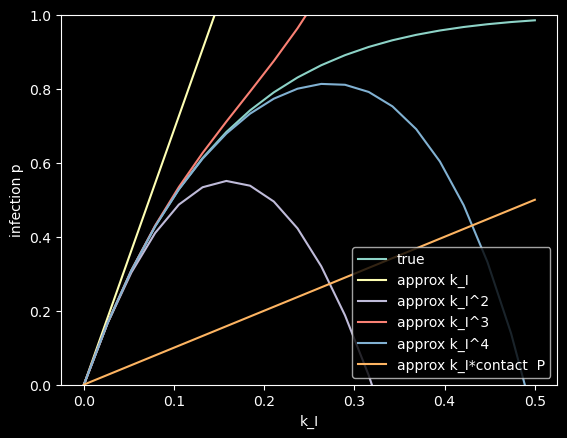

In [81]:
#plt.plot(list(zip(k_Is,k_Is)),results)
plt.plot(k_Is, [x[0]for x in results], label='true')
plt.plot(k_Is, [x[1]for x in results], label='approx k_I')
plt.plot(k_Is, [x[2]for x in results], label='approx k_I^2')
plt.plot(k_Is, [x[3]for x in results], label='approx k_I^3')
plt.plot(k_Is, [x[4]for x in results], label='approx k_I^4')
plt.plot(k_Is, [x[5]for x in results], label='approx k_I*contact  P')
plt.ylabel('infection p')
plt.xlabel('k_I')
plt.legend()
plt.ylim(0,1)

DEBUG:root:0.32009067175834116
DEBUG:root:0.15240536023905982
DEBUG:root:0.15766597343348052
DEBUG:root:0.11319353860598984
DEBUG:root:0.1546487533849881
DEBUG:root:0.08145821539118406
DEBUG:root:0.08242389686143897
DEBUG:root:0.04245425731284744
DEBUG:root:0.03470388701962418
DEBUG:root:0
DEBUG:root:1
DEBUG:root:2
DEBUG:root:3
DEBUG:root:4
DEBUG:root:5
DEBUG:root:6
DEBUG:root:7
DEBUG:root:8
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Subs

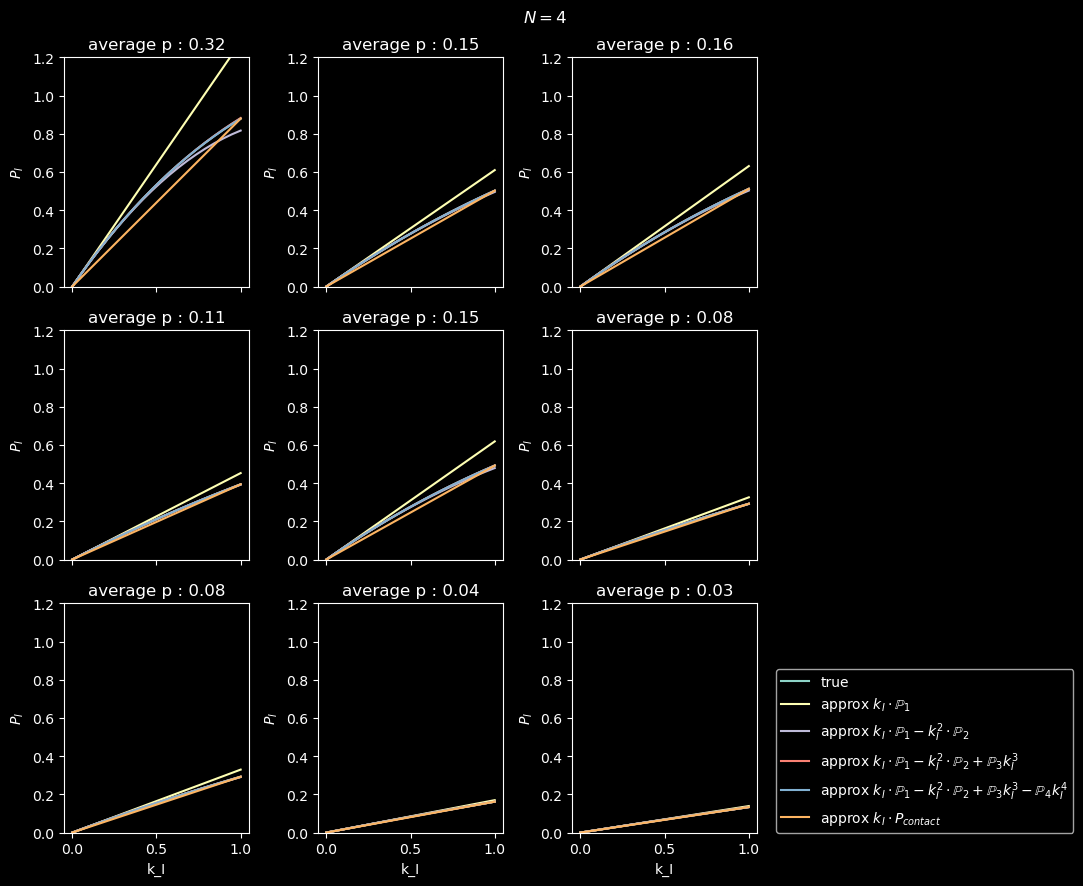

In [87]:
#p = np.array([0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.0,0,0,0.0,0.0,0.0,0.5,0.5,0.1,1,1,1,0.0,0.1,0.1,0.1,0,0,0.1,0.5,0,0.5,0.5])
k_Is = np.linspace(0,1,20)
res_dict = {}
n=4
for i in range(9):
   
    p = np.random.random(n)/(i+1)
    log.debug(p.mean())
    p0 = np.array([0] + list(p))
    results=[]
    
    for k_I in k_Is:
        results.append((
            true_PI(p,p0,k_I),
            approx_1_PI(p,p0,k_I),
            approx_2_PI(p,p0,k_I),
            approx_3_PI(p,p0,k_I),
            approx_4_PI(p,p0,k_I),
            k_I * contact_P(p),
            p.mean()))
    
    res_dict[i] = results   

fig, axes = plt.subplots(3,3, figsize=(11,9), sharex=True)
fig.suptitle(f'$N={n}$')
for i, res in res_dict.items():
    average_p = [x[6] for x in res][0] 
    ax = axes.flatten()[i]
    log.debug(f'{i}')
    ax.plot(k_Is, [x[0] for x in res], label=f'true')
    ax.plot(k_Is, [x[1] for x in res], label=f'approx $k_I \cdot \mathbb{{P}}_1$')
    ax.plot(k_Is, [x[2] for x in res], label=f'approx $k_I \cdot \mathbb{{P}}_1 - k_I^2 \cdot \mathbb{{P}}_2$')
    ax.plot(k_Is, [x[3] for x in res], label=f'approx $k_I \cdot \mathbb{{P}}_1 - k_I^2 \cdot \mathbb{{P}}_2 + \mathbb{{P}}_3 k_I^3$')
    ax.plot(k_Is, [x[4] for x in res], label=f'approx $k_I \cdot \mathbb{{P}}_1 - k_I^2 \cdot \mathbb{{P}}_2 + \mathbb{{P}}_3 k_I^3-\mathbb{{P}}_4 k_I^4$')
    ax.plot(k_Is, [x[5] for x in res], label=f'approx $k_I \cdot P_{{contact}}$')
    ax.set_ylabel(f'$P_I$')
    ax.set_title(f'average p : {average_p :.2f}')
    ax.set_ylim(0,1.2)
    if i > 5:
        ax.set_xlabel('k_I')
ax.legend(loc=(1.1,0))
plt.tight_layout()
fig.savefig(f'plots/approx_4_random_n_{n}_p.png', bbox_inches='tight')

#### Next Implementation into GERDA light

In [36]:
w1 = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           )
w2 = gl.World(
           p_l_t_filepath = 'src/Gangelt_01_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_01_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           )

DEBUG:root:max probability  at day  4
DEBUG:root:max probability  at day  4
DEBUG:root:world with agents without clustering
INFO:root:create contact list
DEBUG:root:0
DEBUG:root:1
DEBUG:root:2
DEBUG:root:3
DEBUG:root:4
DEBUG:root:5
DEBUG:root:6
DEBUG:root:7
DEBUG:root:8
DEBUG:root:9
DEBUG:root:10
DEBUG:root:11
DEBUG:root:12
DEBUG:root:13
DEBUG:root:14
DEBUG:root:15
DEBUG:root:16
DEBUG:root:17
DEBUG:root:18
DEBUG:root:19
DEBUG:root:20
DEBUG:root:21
DEBUG:root:22
DEBUG:root:23
DEBUG:root:24
DEBUG:root:25
DEBUG:root:26
DEBUG:root:27
DEBUG:root:28
DEBUG:root:29
DEBUG:root:30
DEBUG:root:31
DEBUG:root:32
DEBUG:root:33
DEBUG:root:34
DEBUG:root:35
DEBUG:root:36
DEBUG:root:37
DEBUG:root:38
DEBUG:root:39
DEBUG:root:40
DEBUG:root:41
DEBUG:root:42
DEBUG:root:43
DEBUG:root:44
DEBUG:root:45
DEBUG:root:46
DEBUG:root:47
DEBUG:root:48
DEBUG:root:49
DEBUG:root:50
DEBUG:root:51
DEBUG:root:52
DEBUG:root:53
DEBUG:root:54
DEBUG:root:55
DEBUG:root:56
DEBUG:root:57
DEBUG:root:58
DEBUG:root:59
DEBUG:root:60
DE

In [48]:
cpt = w2.contacts # dict {t:[(i,j,p_i_j_t),]} -> {dT:[(i,j,(P1,P2,P3)]}

def resort_contacts_for_agent_pairs(contacts)->dict:
    '''
    {t:[(i,j,p_i_j_t),]} -> {(i,j) : [(t1,p1),(t2,p2)]}
     resorting {t:[(i,j,p_i_j_t),]} -> {(i,j) : [(t1,p1),(t2,p2)]}
     since its sparse use tuples instead of list [p1,p2,... ]
     p1 contact 
    '''
    pair_dict = {} 
    for t, contact_probs_at_t in contacts.items():    
        for x in contact_probs_at_t:
            if (x[0],x[1]) in pair_dict:
                pair_dict[(x[0],x[1])].append((t,x[2]))
            else:
                pair_dict[(x[0],x[1])] = [(t,x[2])]
    return pair_dict

$$\mathbb{P1}_{i,j,T} = \sum^{t_2}_{t=t_1}p_{i,j,t}$$

In [19]:
i , j = 1 , 3
pair_dict[(1,2)]
dT = 10 
pair_dict
## P1 

{(1, 2): [(0, 1.0),
  (1, 1.0),
  (2, 1.0),
  (3, 1.0),
  (4, 1.0),
  (5, 1.0),
  (6, 1.0),
  (7, 1.0),
  (8, 1.0),
  (9, 1.0),
  (19, 1.0),
  (20, 1.0),
  (21, 1.0),
  (22, 1.0),
  (23, 1.0),
  (24, 1.0),
  (25, 1.0),
  (26, 1.0),
  (27, 1.0),
  (28, 1.0),
  (29, 1.0),
  (30, 1.0),
  (31, 1.0),
  (32, 1.0),
  (33, 1.0),
  (43, 1.0),
  (44, 1.0),
  (45, 1.0),
  (46, 1.0),
  (47, 1.0),
  (48, 1.0),
  (49, 1.0),
  (50, 1.0),
  (51, 1.0),
  (52, 1.0),
  (53, 1.0),
  (54, 1.0),
  (55, 1.0),
  (56, 1.0),
  (57, 1.0),
  (67, 1.0),
  (68, 1.0),
  (69, 1.0),
  (70, 1.0),
  (71, 1.0),
  (72, 1.0),
  (73, 1.0),
  (74, 1.0),
  (75, 1.0),
  (76, 1.0),
  (77, 1.0),
  (78, 1.0),
  (79, 1.0),
  (80, 1.0),
  (81, 1.0),
  (91, 1.0),
  (92, 1.0),
  (93, 1.0),
  (94, 1.0),
  (95, 1.0),
  (96, 1.0),
  (97, 1.0),
  (98, 1.0),
  (99, 1.0),
  (100, 1.0),
  (101, 1.0),
  (102, 1.0),
  (103, 1.0),
  (104, 1.0),
  (105, 1.0),
  (115, 1.0),
  (116, 1.0),
  (117, 1.0),
  (118, 1.0),
  (119, 1.0),
  (120, 1.0),
  

In [58]:
def get_P1(p:list)-> float:
    return sum(p)


def get_P2(p:list)-> float: 
    ## assumed that p is arranged from early to later time points
    P2 = 0.0
    for l,pt in enumerate(p):
        P2 += pt * sum(p[:l]) ## numpy?
        #log.debug((P2,pt,l,p[:l]))
    return P2


def get_P3(p:list)-> float: 
    ## assumed that p is arranged from early to later time points
    P2 = 0.0
    for l,pt in enumerate(p):
        P2 += pt * sum(p[:l]) ## numpy?
        #log.debug((P2,pt,l,p[:l]))
    return P2


def get_P3(p):
    P3 = 0.0
    for t, pt in enumerate(p):
        for l, pl in enumerate(p[:t]):
                P3 += pt * pl * sum(p[:l])  
    return P3        

def get_P4(p):
    P4 = 0.0
    for t, pt in enumerate(p):
        for l, pl in enumerate(p[:t]):
            for k, pk in enumerate(p[:l]):
                P4 += pt * pl * pk * sum(p[:k])  
    return P4                

p_list = [0.3,0.4,0.5]
log.debug(f'P1 : {get_P1(p_list)}')
log.debug(f'P2 : {get_P2(p_list)}')
log.debug(f'P3 : {get_P3(p_list)}')



DEBUG:root:P1 : 1.2
DEBUG:root:P2 : 0.47
DEBUG:root:P3 : 0.06


In [ ]:
#p_list = [x[1] for x in t_p_T_list if x[2] == T]## sorted from early to late
#log.debug([(x[0],x[1]) for x in t_p_T_list if x[2] == T])

In [60]:
schedule_timespan = 168
#i , j = 3 , 4
#pair_dict[(i,j)]
dT = 24 

T_max = int(schedule_timespan/dT)

log.debug(f'T_max: {T_max}')

contacts = w1.contacts # dict {t:[(i,j,p_i_j_t),]} -> {dT:[(i,j,(P1,P2,P3)]}

pair_dict = resort_contacts_for_agent_pairs(contacts)

new_time_dict = {}
for  (i,j), t_p_list in pair_dict.items():
   t_p_T_list = [x+(int(x[0]/dT),) for x in  t_p_list]
   
   if  not t_p_T_list:
      continue
   
   for T in range(1,T_max+1):
      
      p_list = [x[1] for x in t_p_T_list if x[2] == T]
      # T+1 ? 
      if p_list:
         P1 = get_P1(p_list)
         P2 = get_P2(p_list)
         P3 = get_P3(p_list)
         P4 = get_P4(p_list)
         if P1 > 0:
            if T in new_time_dict:
               new_time_dict[T].append((i,j,P1,P2,P3,P4))
            else:
               new_time_dict[T] =[(i,j,P1,P2,P3,P4)]  
      #log.debug((T,i,j,P1,P2,P3))      


DEBUG:root:T_max: 7


In [45]:
len(new_time_dict[1])
new_time_dict[1]

[(2, 3, 15.0, 105.0, 455.0),
 (4, 5, 5.0, 11.25, 15.0),
 (4, 6, 5.0, 11.25, 15.0),
 (5, 6, 8.0, 29.25, 64.75),
 (7, 8, 3.666666666666667, 6.111111111111111, 6.111111111111112),
 (7, 9, 4.166666666666667, 7.944444444444445, 9.166666666666664),
 (7, 10, 4.166666666666667, 7.944444444444445, 9.166666666666664),
 (8, 9, 5.666666666666665, 14.944444444444443, 24.333333333333336),
 (8, 10, 5.6715927750410495, 14.972359058565955, 24.406951286261634),
 (9, 10, 6.242759149215769, 18.24944886041588, 33.17336369128585),
 (12, 13, 8.511160714285714, 33.34491589604592, 79.74651737046311),
 (12, 14, 5.5, 13.75, 20.625),
 (13, 14, 6.5, 19.25, 34.375),
 (15, 16, 14.0, 91.0, 364.0),
 (17, 18, 12.0, 66.0, 220.0),
 (20, 21, 5.666666666666665, 14.694444444444443, 23.166666666666668),
 (20, 22, 5.166666666666666, 12.361111111111109, 18.15277777777778),
 (20, 23, 5.166666666666666, 12.111111111111109, 17.111111111111107),
 (21, 22, 4.666666666666666, 10.027777777777777, 13.138888888888891),
 (21, 23, 3.6666

In [ ]:
pl = []
if pl is []:
    print('s')

tup = (1,2)
tup3 = tup + (1,)
tup3